In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import requests 
from io import StringIO

In [42]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'landed']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    #plt.savefig('confmatrix.png', bbox_inches='tight')
    plt.show()

In [4]:
url1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
response = requests.get(url1)
if response.status_code == 200:
    csv_data = response.text
    csv_file = StringIO(csv_data)
    df = pd.read_csv(csv_file)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

In [5]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(url2)
if response.status_code == 200:
    csv_data = response.text
    csv_file = StringIO(csv_data)
    X = pd.read_csv(csv_file)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

In [6]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
Y = df['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [8]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
parameters = {'C':[0.01,0.1,1],
              'penalty':['l2'],
              'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [11]:
print('Tuned hyperparameters :(best parameters) ',logreg_cv.best_params_)
print('Accuracy :', logreg_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8035714285714285


In [12]:
logreg_cv.score(X_test, Y_test)

0.9444444444444444

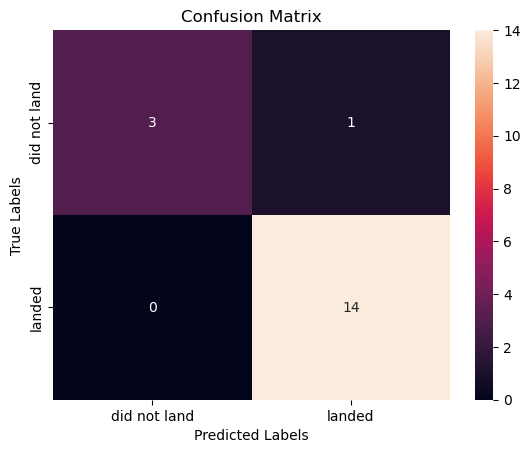

In [41]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



In [15]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)                           

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [16]:
print('Tuned hyperparameters: ',svm_cv.best_params_)
print('Accuracy: ', svm_cv.best_score_)

Tuned hyperparameters:  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy:  0.832142857142857


In [17]:
svm_cv.score(X_test, Y_test)

0.8888888888888888

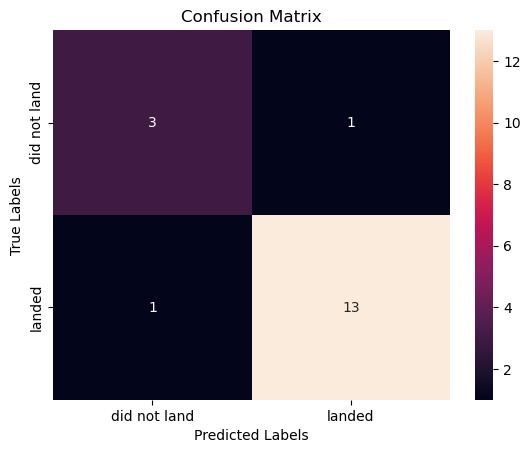

In [18]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [19]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              #'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2,5,10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10, error_score='raise')
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [20]:
print("Tuned hyperparameter: ", tree_cv.best_params_)
print("Accuracy: ", tree_cv.best_score_)

Tuned hyperparameter:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy:  0.8607142857142858


In [21]:
tree_cv.score(X_test, Y_test)

0.9444444444444444

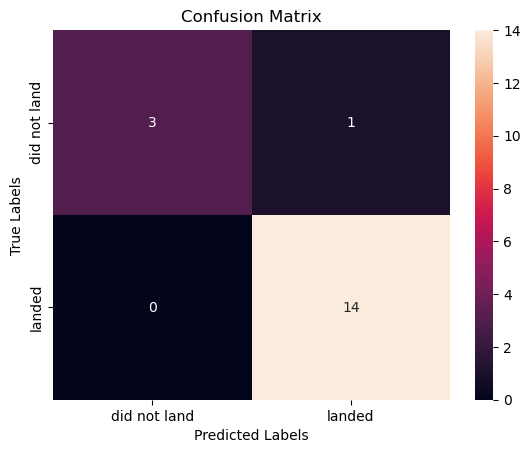

In [22]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [23]:
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [24]:
print("Tuned hyperparameters: ", knn_cv.best_params_)
print("Accuracy: ", knn_cv.best_score_)

Tuned hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Accuracy:  0.8446428571428569


In [25]:
knn_cv.score(X_test, Y_test)

0.9444444444444444

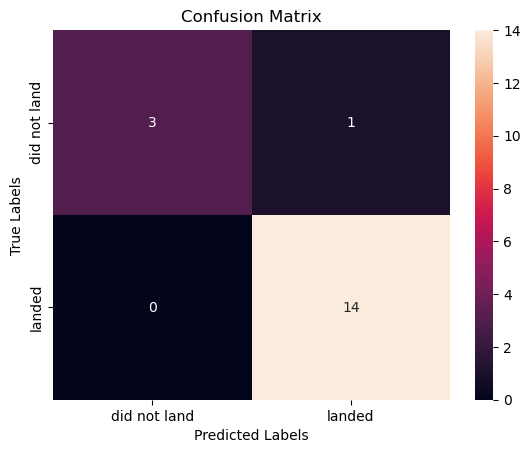

In [26]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

/var/folders/n1/vy3gggjs7jjgs92bw1s1m9280000gn/T/ipykernel_51514/1993873285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


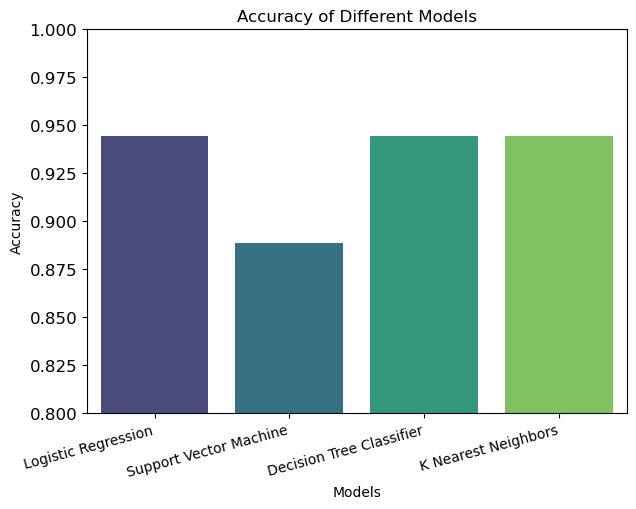

In [39]:
model_names = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 'K Nearest Neighbors']
accuracies = [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test)]
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.ylim(0.8, 1)
plt.yticks(size=12)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.savefig('bar_chart.png', bbox_inches='tight')
plt.show()